### Deanna's text

In [17]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image 
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer

In [34]:
text = pd.read_csv(r"D:\Downloads\deanna.csv")
text.head()

,date,Column2,subject,message,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,20/05/2017,3:21 PM,Deanna,Heyyyyyyy,NaN,NaN,NaN
1,20/05/2017,3:21 PM,Deanna,Afterward wanna meet beside swimming pool mah...,NaN,NaN,NaN
2,20/05/2017,3:21 PM,Deanna,Wait the car car together ðŸ˜¬,NaN,NaN,NaN
3,20/05/2017,3:25 PM,George Wong,"Okay, good idea, need places to put my stuffs...",NaN,NaN,NaN
4,20/05/2017,4:05 PM,Deanna,Then meet at 530pm is it ok?,NaN,NaN,NaN


In [35]:
text.drop(columns=['Unnamed: 5','Unnamed: 6'], inplace = True)

In [36]:
text.drop(columns=['Unnamed: 4'], inplace = True)

In [37]:
text.head()

,date,Column2,subject,message
0,20/05/2017,3:21 PM,Deanna,Heyyyyyyy
1,20/05/2017,3:21 PM,Deanna,Afterward wanna meet beside swimming pool mah...
2,20/05/2017,3:21 PM,Deanna,Wait the car car together ðŸ˜¬
3,20/05/2017,3:25 PM,George Wong,"Okay, good idea, need places to put my stuffs..."
4,20/05/2017,4:05 PM,Deanna,Then meet at 530pm is it ok?


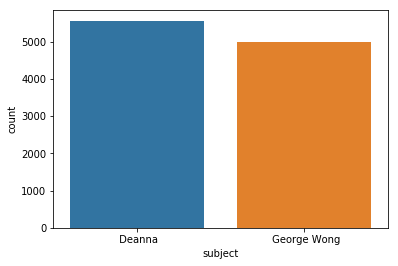

In [38]:
sns.countplot(text['subject'])

In [39]:
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

testing = text.message[:-1]
new_result = []
for t in testing:
    new_result.append(tweet_cleaner_updated(t))

C:\Users\George\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' .......'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\George\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' .'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\George\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' .....'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\George\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' .....'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\George\Anaconda3\lib\site-packages\bs4\__init__.p

In [40]:
clean_df = pd.DataFrame(new_result,columns=['comment'])
clean_df['subject'] = text.subject
clean_df['date'] = text.date
clean_df.shape

(10555, 3)

In [41]:
clean_df.head()

,comment,subject,date
0,heyyyyyyy,Deanna,20/05/2017
1,afterward wanna meet beside swimming pool mah ...,Deanna,20/05/2017
2,wait the car car together,Deanna,20/05/2017
3,okay good idea need places to put my stuffs,George Wong,20/05/2017
4,then meet at pm is it ok,Deanna,20/05/2017


In [42]:
clean_df = clean_df[['date','subject','comment']]

In [43]:
clean_df['polarity'] = clean_df.apply(lambda x: TextBlob(x['comment']).sentiment.polarity, axis=1)
clean_df['subjectivity'] = clean_df.apply(lambda x: TextBlob(x['comment']).sentiment.subjectivity, axis=1)

In [44]:
clean_df.head()

,date,subject,comment,polarity,subjectivity
0,20/05/2017,Deanna,heyyyyyyy,0.0,0.00
1,20/05/2017,Deanna,afterward wanna meet beside swimming pool mah ...,0.2,0.40
2,20/05/2017,Deanna,wait the car car together,0.0,0.00
3,20/05/2017,George Wong,okay good idea need places to put my stuffs,0.6,0.55
4,20/05/2017,Deanna,then meet at pm is it ok,0.5,0.50


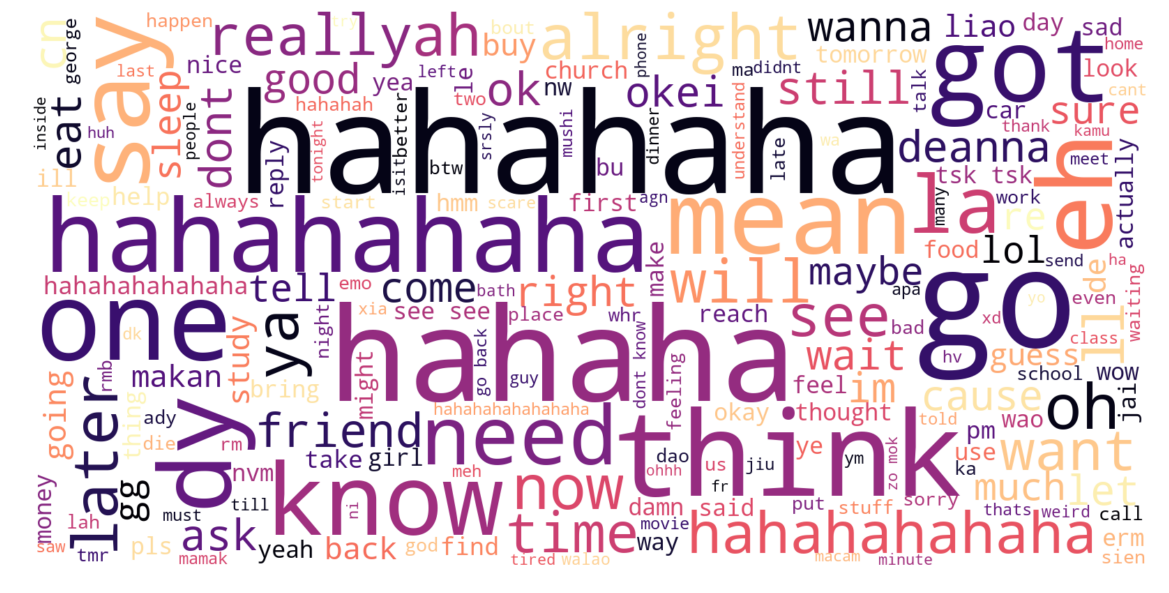

In [45]:
neg_review = clean_df
neg_string = []
for t in neg_review.comment:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

# wave_mask = np.array(Image.open( "D:\Python Projects\Kaodim_red.png"))

wordcloud = WordCloud(background_color="white",colormap="magma", width=1600, height=800,max_font_size=200).generate(neg_string)
fig = plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig("deannatext.jpg")
plt.show()

In [47]:
clean_df['time'] = clean_df['date'].astype('datetime64[ns]')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72],
 <a list of 73 Text xticklabel objects>)

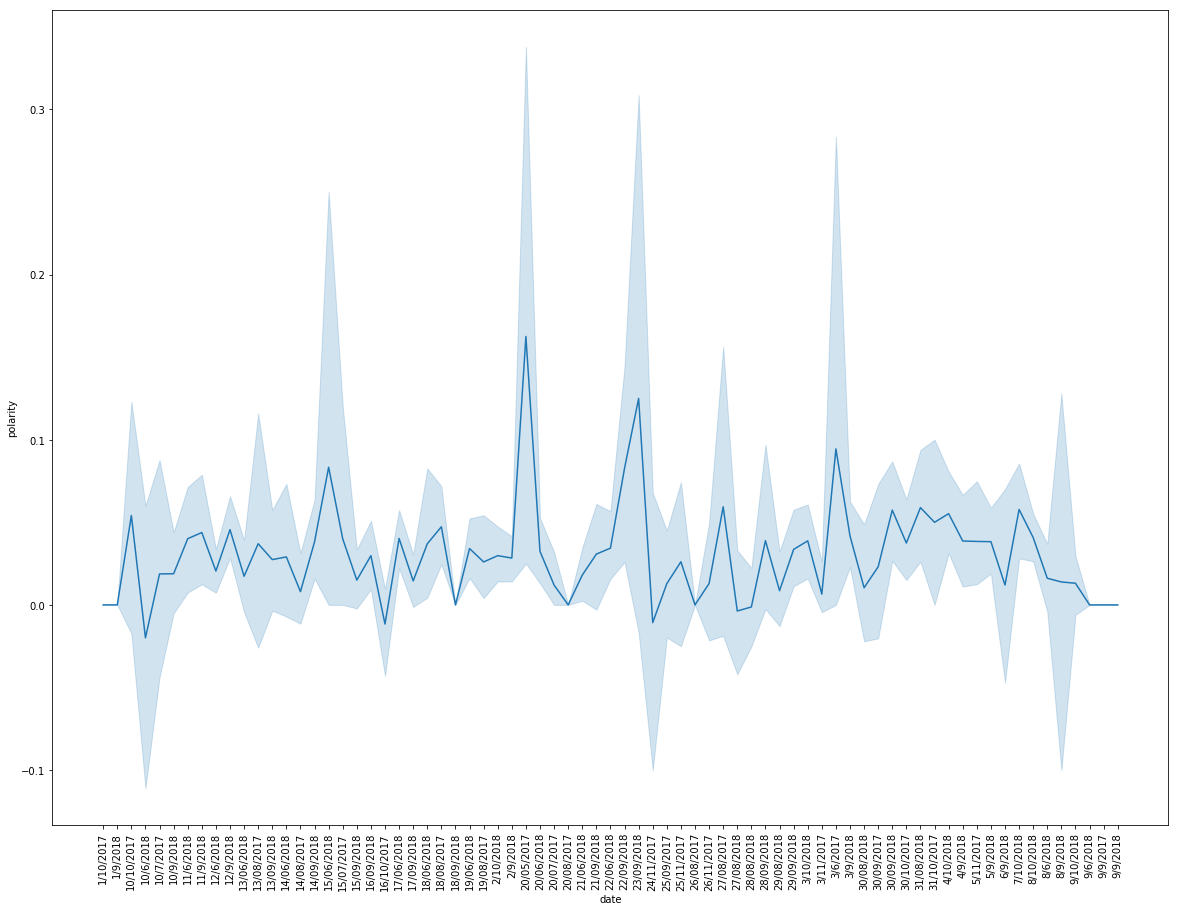

In [51]:
fig = plt.figure(figsize=(20,15))
sns.lineplot(x='date', y = 'polarity', data = clean_df)

plt.xticks(rotation=90)

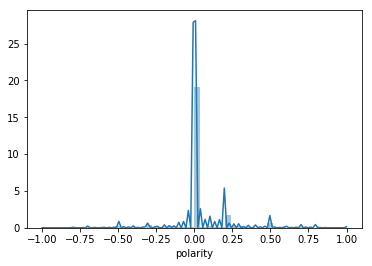

In [61]:
sns.distplot(clean_df['polarity'])

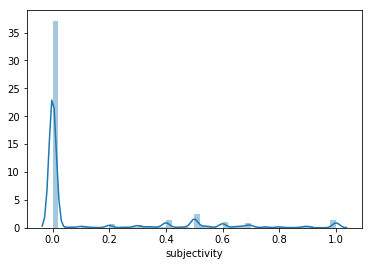

In [62]:
sns.distplot(clean_df['subjectivity'])

In [87]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10555 entries, 0 to 10554
Data columns (total 6 columns):
date            10555 non-null object
subject         10555 non-null object
comment         10555 non-null object
polarity        10555 non-null float64
subjectivity    10555 non-null float64
time            10555 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 494.8+ KB


In [86]:
fog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 2 columns):
name    7323 non-null object
text    7071 non-null object
dtypes: object(2)
memory usage: 114.5+ KB


In [116]:
fog = pd.read_csv(r"D:\Downloads\fog.csv")
fog.head()

,name,text,length
0,Nikie,"george,write ur name~haha",26
1,George Wong,Date with Lala noodle (Monday 7pm).,36
2,Jai Seng,Yea phan. U cnt imagine how it is like te day...,61
3,Stephen Phan,Haha no worries. I'll be back soon hahah,41
4,Nikie,then you cant do connaught traditional to jai...,52


In [117]:
fog.isnull().sum()

name      0
text      0
length    0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

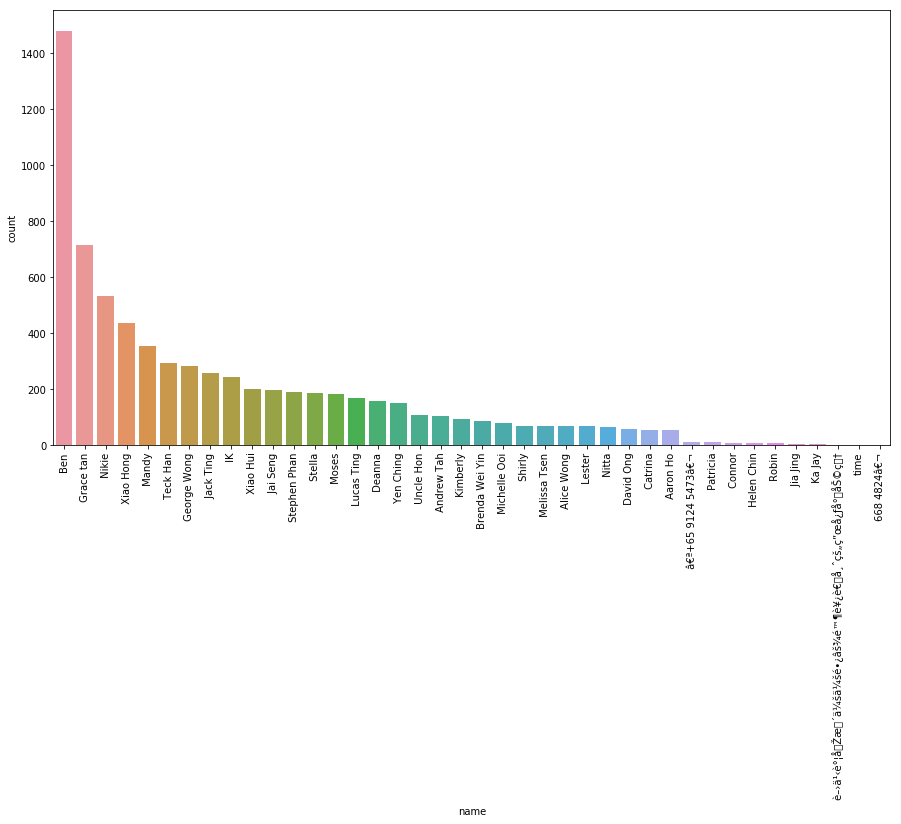

In [118]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x = 'name', data = fog, order = fog['name'].value_counts().index)
plt.xticks(rotation=90)

In [105]:
ben = fog[fog['name'] == " Ben"]
ben.head()

,name,text,length
36,Ben,~abc~,6
50,Ben,æˆ‘è§‰å¾—ä¸éœ€è¦æ£€è®¨ï¼Œåªè¦å¯¹è‡ªå·±æœ‰...,55
60,Ben,Petaling street,16
90,Ben,@60168928930 where are you,28
91,Ben,I'm at pasar seni station,26


In [108]:
fog['polarity'] = fog.apply(lambda x: TextBlob(x['text']).sentiment.polarity, axis=1)
fog['subjectivity'] = fog.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity, axis=1)

In [109]:
fog.head()

,name,text,length,polarity,subjectivity
0,Nikie,"george,write ur name~haha",26,0.0,0.00
1,George Wong,Date with Lala noodle (Monday 7pm).,36,0.0,0.00
2,Jai Seng,Yea phan. U cnt imagine how it is like te day...,61,0.0,0.00
3,Stephen Phan,Haha no worries. I'll be back soon hahah,41,0.1,0.15
4,Nikie,then you cant do connaught traditional to jai...,52,0.0,0.75


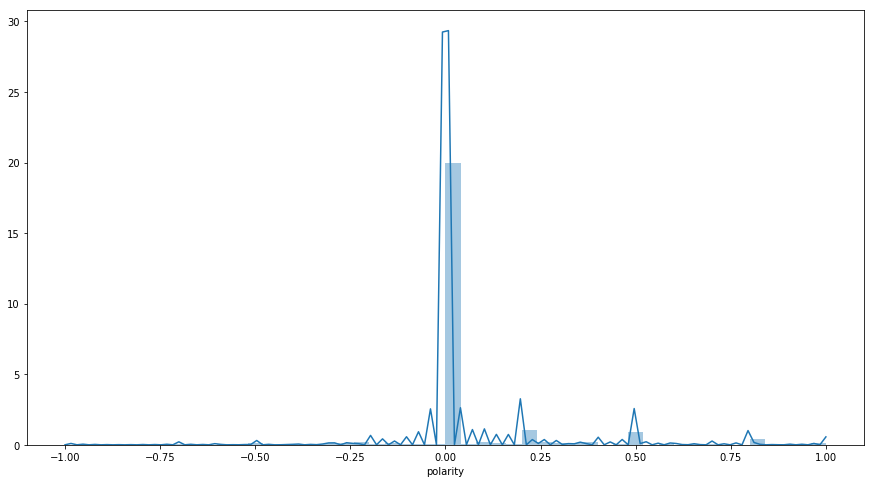

In [113]:
fig = plt.figure(figsize=(15,8))
sns.distplot(fog['polarity'])

In [92]:
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

testing = fog.text[:-1]
result = []
for t in testing:
    result.append(tweet_cleaner_updated(t))

C:\Users\George\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' ....'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\George\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' ...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\George\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' ...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [93]:
new_fog = pd.DataFrame(result,columns=['comment'])
new_fog.shape

(7067, 1)

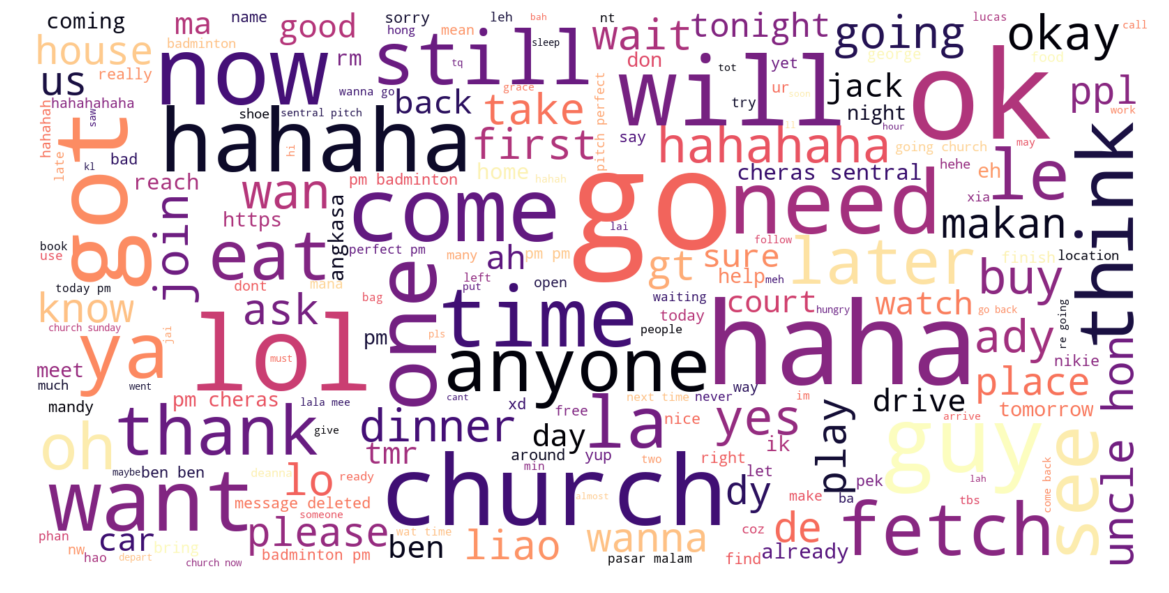

In [94]:
neg_review = new_fog
neg_string = []
for t in neg_review.comment:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

# wave_mask = np.array(Image.open( "D:\Python Projects\Kaodim_red.png"))

wordcloud = WordCloud(background_color="white",colormap="magma", width=1600, height=800,max_font_size=200).generate(neg_string)
fig = plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig("fog.jpg")
plt.show()